In [1]:
%load_ext autoreload

%autoreload 2

In [2]:
from missile_gym import MissileGym

In [3]:
from tqdm.notebook import tqdm
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pylab import figure, subplot2grid
from functional import seq
from ipywidgets import interact, interactive, fixed
import ipywidgets
from math import *
%config InlineBackend.figure_format = 'svg'

In [37]:
gym = MissileGym.make_simple_scenario((1500, 500), (-400, 0))
done = False
reward = 0
obs = gym.reset()
state = gym.get_state()
history = [(state, obs, 0, done, {})]
alphas_targeting = [0]
while not done:
    obs, reward, done, info = gym.step_with_guidance()
    state = gym.get_state()
    history.append((state, obs, reward, done, info))
    alphas_targeting.append(gym.missile.alpha_targeting if abs(gym.missile.alpha_targeting) < gym.missile.alphamax else copysign(gym.missile.alphamax, gym.missile.alpha_targeting))
    
#     if gym.missile.alpha < 0:
#         print(gym.missile.alpha, gym.missile._get_dydt(gym.missile.t, gym.missile.state[:-1])[3])
print(info['done_reason'])

мы попали


In [38]:
%matplotlib inline

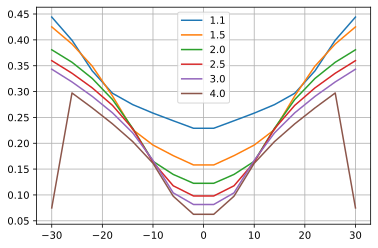

In [39]:
gym.missile.Cya_itr.plot2d()

In [40]:
gym.missile.Cya_itr.fs

array([[0.44416667, 0.42513333, 0.38083333, 0.3598    , 0.34326667,
        0.07486667],
       [0.39926923, 0.39196154, 0.35669231, 0.33542308, 0.31861538,
        0.29726923],
       [0.34004545, 0.34918182, 0.32536364, 0.30713636, 0.29063636,
        0.26836364],
       [0.29666667, 0.29144444, 0.28455556, 0.27327778, 0.25883333,
        0.2375    ],
       [0.27471429, 0.22635714, 0.22892857, 0.228     , 0.22      ,
        0.20314286],
       [0.2583    , 0.1965    , 0.165     , 0.1634    , 0.1669    ,
        0.1613    ],
       [0.2435    , 0.176     , 0.13966667, 0.11766667, 0.104     ,
        0.0975    ],
       [0.229     , 0.158     , 0.1225    , 0.098     , 0.0815    ,
        0.0625    ],
       [0.229     , 0.158     , 0.1225    , 0.098     , 0.0815    ,
        0.0625    ],
       [0.2435    , 0.176     , 0.13966667, 0.11766667, 0.104     ,
        0.0975    ],
       [0.2583    , 0.1965    , 0.165     , 0.1634    , 0.1669    ,
        0.1613    ],
       [0.27471429, 0

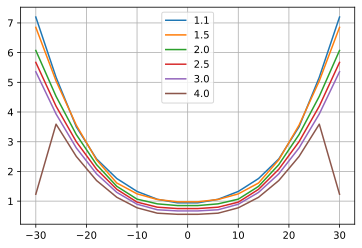

In [41]:
gym.missile.Cx_itr.plot2d()

In [42]:
def get_an_atau(vel0, vel1, tau):
    g = 9.81
    vel0 = np.array(vel0)
    vel1 = np.array(vel1)
    a = (vel1-vel0)/tau - np.array([0, -g])
    a_tau = np.dot(a, vel0/np.linalg.norm(vel0)) *  vel0/np.linalg.norm(vel0)
    a_n = a - a_tau
    return copysign(np.linalg.norm(a_n)/g, np.cross(vel0, a_n)), copysign(np.linalg.norm(a_tau)/g, np.dot(a_tau, vel0))
    

In [43]:
mis_xs = []
mis_ys = []
trg_xs = []
trg_ys = []
ts = []
mis_vs = []
trg_vs = []
rewards = []
alphas = []
trg_vels = []
mis_vels = []
Qs = []
for state, obs, reward, done, info in tqdm(history):
    gym.set_state(state)
    mis_smry = gym.missile.get_summary()
    trg_smry = gym.target.get_summary()
    mis_xs.append(mis_smry['x'])
    mis_ys.append(mis_smry['y'])
    trg_xs.append(trg_smry['x'])
    trg_ys.append(trg_smry['y'])
    ts.append(mis_smry['t'])
    mis_vs.append(mis_smry['v'])
    trg_vs.append(trg_smry['v'])
    rewards.append(reward)
    alphas.append(mis_smry['alpha'])
    Qs.append(mis_smry['Q'])
    
    trg_vels.append(gym.target.vel)
    mis_vels.append(gym.missile.vel)

trg_nys = [get_an_atau(v0, v1, t1-t0)[0] for v0, v1, t1, t0 in zip(trg_vels, trg_vels[1:], ts[1:], ts)]
trg_nys += [trg_nys[-1]]
mis_nys = [get_an_atau(v0, v1, t1-t0)[0] for v0, v1, t1, t0 in zip(mis_vels, mis_vels[1:], ts[1:], ts)]
mis_nys += [trg_nys[-1]]

trg_nxs = [get_an_atau(v0, v1, t1-t0)[1] for v0, v1, t1, t0 in zip(trg_vels, trg_vels[1:], ts[1:], ts)]
trg_nxs += [trg_nxs[-1]]
mis_nxs = [get_an_atau(v0, v1, t1-t0)[1] for v0, v1, t1, t0 in zip(mis_vels, mis_vels[1:], ts[1:], ts)]
mis_nxs += [trg_nxs[-1]]


In [44]:
@interact(i=ipywidgets.IntSlider(min=0,max=len(history)-1,step=1, value=len(history)-1))
def draw(i):
    f0 = figure(num = 0, figsize = (17, 7))
    ax01 = subplot2grid((4, 7), (0, 0), colspan=4, rowspan=4)
    ax02 = subplot2grid((4, 7), (0, 4), colspan=3, rowspan=1)
    ax03 = subplot2grid((4, 7), (1, 4), colspan=3, rowspan=1,sharex=ax02)
    ax04 = subplot2grid((4, 7), (2, 4), colspan=3, rowspan=1,sharex=ax02)
    ax05 = subplot2grid((4, 7), (3, 4), colspan=3, rowspan=1,sharex=ax02)
    f0.subplots_adjust(hspace=0)   
    f0.subplots_adjust(wspace=0.7)  
    
    state = history[i][0]
    gym.set_state(state)
    gym.render(fig=f0, ax=ax01)
    ax01.plot(mis_xs[:i], mis_ys[:i], ls=':')
    ax01.plot(trg_xs[:i], trg_ys[:i], ls=':')
    ax01.grid(True)
    
    ax02.plot(ts[:i], mis_vs[:i], label='Скорость ракеты')
    ax02.plot(ts[:i], trg_vs[:i], label='Скорость цели')
    ax02.legend()
    ax02.grid(True)
    
#     ax03.plot(ts[:i], rewards[:i], label='Награда_')
    ax03.plot(ts[:i], Qs[:i], label='Q')
    ax03.legend()
    ax03.grid(True)
    
    ax04.plot(ts[:i], alphas[:i], label=r'$\alpha_{текущий}$')
    ax04.plot(ts[:i], alphas_targeting[:i], label=r'$\alpha_{потребный}$', color='y', ls='-')
    ax04.legend()
    ax04.grid(True)
    
    ax05.plot(ts[:i], mis_nys[:i], label=r'$n_y$ ракеты', c='b')
    ax05.plot(ts[:i], trg_nys[:i], label=r'$n_y$ цели', c='orange')
    
    ax05.plot(ts[:i], mis_nxs[:i], label=r'$n_x$ ракеты', c='b', ls='--')
    ax05.plot(ts[:i], trg_nxs[:i], label=r'$n_x$ цели', c='orange', ls='--')
    ax05.legend()
    ax05.grid(True)
    
    plt.show()

interactive(children=(IntSlider(value=85, description='i', max=85), Output()), _dom_classes=('widget-interact'…

In [52]:
import time
with tqdm(total=100) as pbar:
    
    for j in tqdm(range(11)):
        pbar.reset()
        for i in range(10):
            time.sleep(0.1)
            pbar.update(10)
        

In [57]:
V_c = -300
def hit_foo(x, y, V_c):
    gym = MissileGym.make_simple_scenario((x, y), (V_c, 0))
    done = False
    reward = 0
    obs = gym.reset()
    state = gym.get_state()
    history = [(state, obs, 0, done, {})]
    alphas_targeting = [0]
    while not done:
        obs, reward, done, info = gym.step_with_guidance()
        state = gym.get_state()
        history.append((state, obs, reward, done, info))
        alphas_targeting.append(gym.missile.alpha_targeting if abs(gym.missile.alpha_targeting) < gym.missile.alphamax else copysign(gym.missile.alphamax, gym.missile.alpha_targeting))

    #     if gym.missile.alpha < 0:
    #         print(gym.missile.alpha, gym.missile._get_dydt(gym.missile.t, gym.missile.state[:-1])[3])
    return state, obs, reward, done, info

In [58]:
xs = np.linspace(-7000, 7000, 11)
ys = np.linspace(300, 5000, 11)
results = []
with tqdm(total=ys.shape[0]) as pbar:
    for i, x in enumerate(tqdm(xs)):
        pbar.reset()
        for j, y in enumerate(ys):
            results.append(hit_foo(x,y,V_c))
            pbar.update(1)

In [67]:
Ys, Xs = np.meshgrid(ys, xs)
Zs = np.zeros_like(Xs)
k = 0
for i, x in enumerate(xs):
    for j, y in enumerate(ys):
        Zs[i,j] = 1 if  results[k][4]['done_reason'] == 'мы попали' else 0
        k += 1

In [60]:
seq(results).map(lambda r: r[4]['done_reason']).count_by_value()

мы упали,51
слишком долго,6
мы попали,64


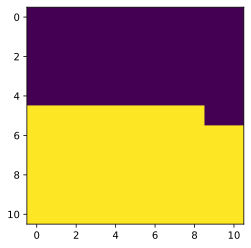

In [68]:
plt.imshow(Zs)
plt.show()

In [69]:
120*30

3600

In [73]:
len(f'{3**3600}')

1718